In [6]:
from IPython.display import Image

---------------------------
#### Multi Layer Perceptron
--------------------------

The MLP network consists of input, output and __hidden layers__.

Each hidden layer consists of numerous __perceptron's__ which are called hidden units


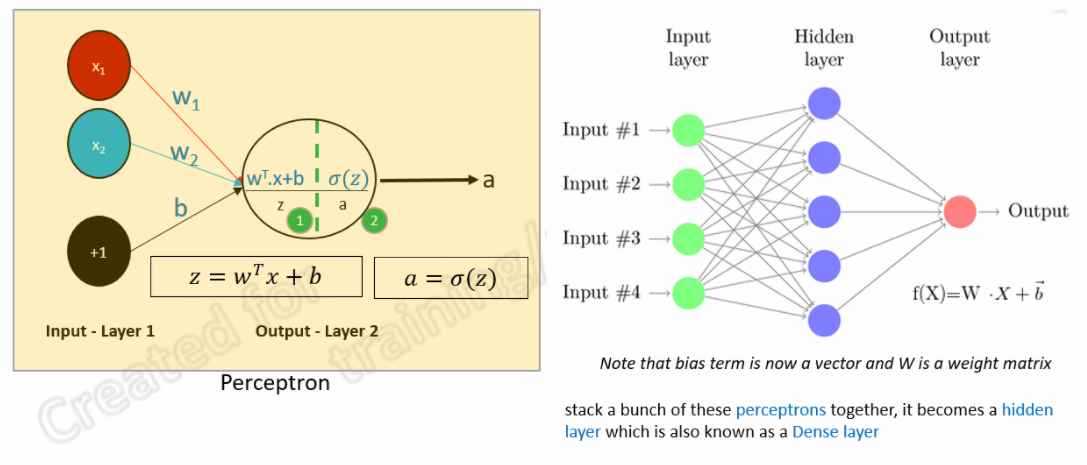

In [12]:
Image(r'S:\AI-icons-images\MLP00.PNG', width=800)

- Just as with the perceptron, the inputs are pushed forward through the MLP by taking the `dot` product of the input with the weights that exist between the input layer and the hidden layer ($W_h$).  

- This dot product yields a value at the hidden layer. 

- MLPs utilize __activation__ functions at each of their calculated layers.  
    - rectified linear units (ReLU), 
    - sigmoid function, 
    - tanh.  

- Push the calculated output at the current layer through any of these `activation functions`.

- Once the calculated output at the hidden layer has been pushed through the activation function, push it to the next layer in the MLP by taking the dot product with the corresponding weights.

- Repeat steps .. until the output layer is reached.

4. At the output layer, the calculations will either be used for a `backpropagation` algorithm that corresponds to the activation function that was selected for the MLP (in the case of training) or a decision will be made based on the output (in the case of testing).

> `MLPs` form the basis for all neural networks and have greatly improved the power of Deep Learning when applied to classification and regression problems.  

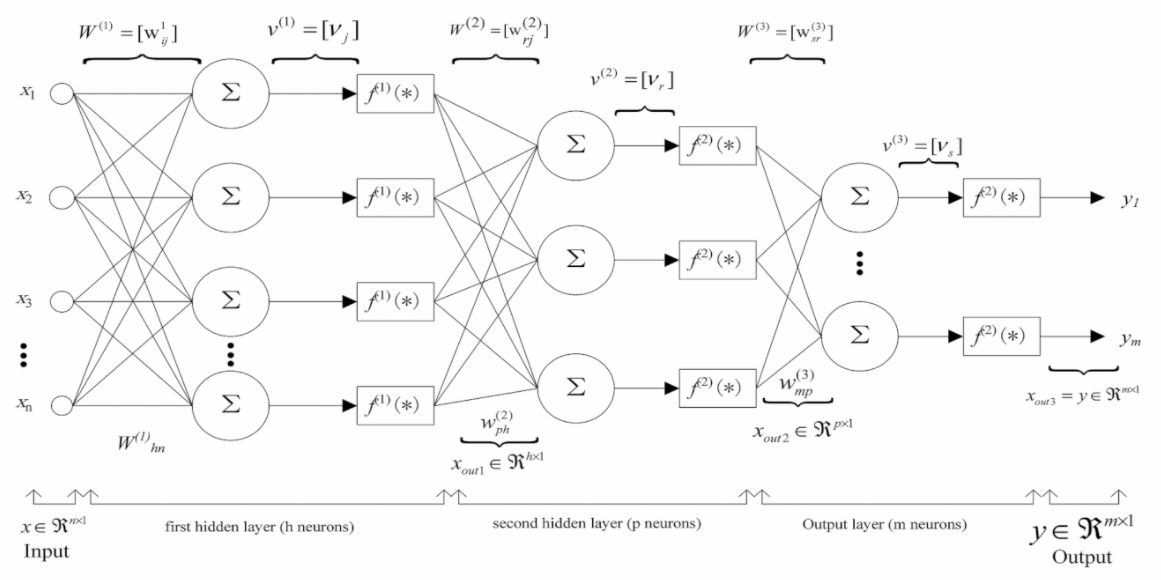

In [13]:
Image(r'S:\AI-icons-images\MLP01.PNG', width=800)

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor

- `hidden_layer_sizes` tuple, length = n_layers - 2, default=(100,)
    - The ith element represents the number of neurons in the ith hidden layer.
    - [64, 32, 16, 8]
        - 4 hidden layers
            - 1st layer with 64 neurons
            - 2nd layer with 32 neurons
            - 3rd layer with 16 nodes
            - 4th layer with  8 nodes
- `activation` 
    - {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
        - we will use 'logistic`
            - synonymous with `sigmoid`
- `solver` {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
    - choice of gradient descent
    - simple GD will be `sgd`
    - Note: 
        - The default solver `adam` works pretty well on relatively `large datasets` (with thousands of training samples or more) in terms of both training time and validation score. 
        - For `small datasets`, however, ‘lbfgs’ can converge faster and perform better.
    
- `batch_size` int, default=’auto’
    - typical values 
        - 256, 200, 128, 64, 32
- `alpha` float, default=0.0001
    - L2 penalty (regularization term) parameter.
    
- `learning_rate`
    - {‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
- `learning_rate_init` double, default=0.001
    - The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.
- `max_iter` int, default=200
    - Maximum number of iterations. 
    - The `solver iterates until convergence` (determined by ‘tol’) or this `number of iterations`. 
    - For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.
- `shuffle` bool, default=True
    - Whether to shuffle samples in each iteration. 
    - Only used when solver=`sgd` 
- `tol` float, default=1e-4
    - threshold
    - Tolerance for the optimization. 
    - When the `loss or score` is not improving by at least `tol` for `n_iter_no_change` consecutive iterations, unless learning_rate is set to ‘adaptive’, convergence is considered to be reached and training stops.
- `verbose` bool, default=False
    - Whether to print progress messages to stdout.
- `early_stopping` - bool, default=False
    - Whether to use early stopping to terminate training when validation score is not improving. 
    - If set to true, it will automatically set aside 10% of training data as validation and terminate training when `validation score is not improving` by at least `tol` for `n_iter_no_change` consecutive epochs. 
    - The split is stratified, except in a multilabel setting. Only effective when solver=’sgd’ or ‘adam’
- `validation_fraction` float, default=0.1
    - The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. 
    - Only used if early_stopping is True
    - typical good values 
        - 20%, 25%, 30%
- `n_iter_no_change` int, default=10
    - Maximum number of epochs/iterations to not meet `tol` improvement. 
    - Only effective when solver=’sgd’ or ‘adam’
    - typical values 
        - 10, 15, 20
- `random_state` int, RandomState instance, default=None
    - Determines random number generation for `weights` and `bias` initialization, `train-test split` if early stopping is used, and batch sampling when solver=’sgd’ or ‘adam’. 
    - Pass an `int` for reproducible results across multiple function calls.

In [32]:
location = r'S:\AI-DATASETS\Healthcare_Investments_and_Hospital_Stay.csv'

In [33]:
df = pd.read_csv(location)

In [34]:
df.sample(6)

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
239,ITA,2012,6.8,24.62,33.29,24.62
61,BEL,2018,6.6,11.64,23.89,11.64
202,HUN,2010,5.8,3.00,7.30,3.00
441,RUS,2000,13.5,1.13,2.58,1.13
304,NLD,2017,5.0,13.02,13.48,13.02
169,DEU,2015,7.6,33.63,35.09,33.63


<AxesSubplot:>

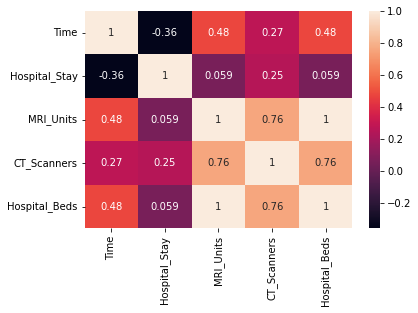

In [35]:
sns.heatmap(df.corr(), annot= True)

In [36]:
df = pd.get_dummies(df)

In [37]:
df.sample(5)

,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds,Location_AUS,Location_AUT,Location_BEL,Location_CAN,Location_CZE,...,Location_LVA,Location_NLD,Location_NZL,Location_POL,Location_PRT,Location_RUS,Location_SVK,Location_SVN,Location_TUR,Location_USA
132,2018,6.4,27.38,16.50,27.38,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295,2008,6.0,10.40,10.22,10.40,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
217,2012,5.9,12.39,16.74,12.39,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,2017,7.4,11.74,16.77,11.74,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369,2012,3.9,9.58,13.53,9.58,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
# Split df into X and y
y = df['Hospital_Stay'].copy()
X = df.drop('Hospital_Stay', axis=1).copy()

In [39]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [40]:
# Scale X with a standard scaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [41]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [72]:
model = MLPRegressor()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

D:\ANACONDA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


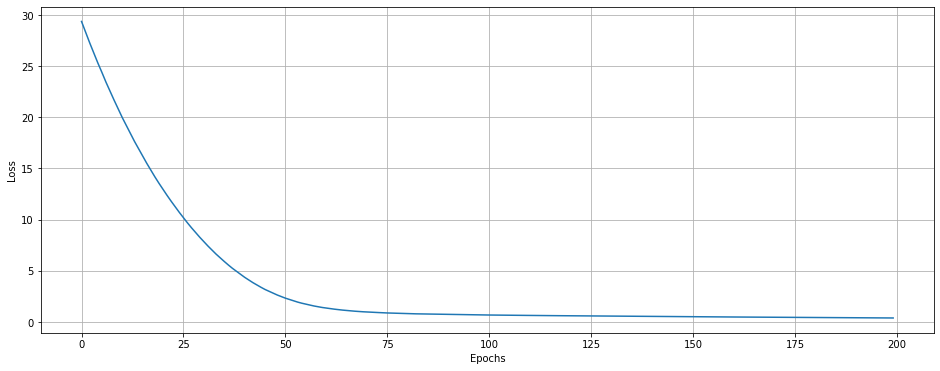

In [73]:
plt.figure(figsize=(16, 6))

plt.plot(range(len(model.loss_curve_)), model.loss_curve_)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid();

In [74]:
from sklearn import metrics

print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('MPE                     : ', np.mean((y_test - y_pred) / y_test) * 100)
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Abs Error   MAE    :  0.42358684257361984
Mean Sq  Error MSE      :  0.3170167100981817
Root Mean Sq Error RMSE :  0.5630423697184624
MAPE                    :  5.998242299942898
MPE                     :  -0.3141471181874638
r2 value                :  0.9309287759666729


#### Tuning of the model

#### Another config
- more number of layers
- more neurons at each layer

In [76]:
model = MLPRegressor(hidden_layer_sizes = (64, 32, 16, 8),
                    learning_rate      = 'constant',
                    learning_rate_init = 0.001,
                    tol                = 0.001,
                    max_iter           = 1000,
                    early_stopping     = True,
                    n_iter_no_change   = 5,
                    warm_start         = False
                    )

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('MPE                     : ', np.mean((y_test - y_pred) / y_test) * 100)
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Abs Error   MAE    :  0.7728674323459958
Mean Sq  Error MSE      :  1.1311621870269921
Root Mean Sq Error RMSE :  1.0635610875859423
MAPE                    :  10.96710317056884
MPE                     :  -3.0691822320528783
r2 value                :  0.7535437270358017


**Observation**
- rerunning the model(as is)
    - produces DIFFERENT results
        - Determines random number generation for 
            - `weights` and `bias` initialization, 
            - `train-test split` if `early stopping` is used, and 
            - `batch` sampling

**Another config**
- add batch_size
- add random_state

In [82]:
model = MLPRegressor(
                    hidden_layer_sizes = (128, 64, 32, 16, 8),
                    learning_rate      = 'constant',
                    learning_rate_init = 0.001,
                    tol                = 0.001,
                    max_iter           = 1000,
                    early_stopping     = True,
                    n_iter_no_change   = 5,
                    batch_size         = 32,
                    random_state       = 111
                
                    )

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('MPE                     : ', np.mean((y_test - y_pred) / y_test) * 100)
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Abs Error   MAE    :  0.21443661575029482
Mean Sq  Error MSE      :  0.09206940967702369
Root Mean Sq Error RMSE :  0.3034294146535957
MAPE                    :  3.1181974600594486
MPE                     :  -0.26221231393582617
r2 value                :  0.979940026440725


**Another config**
- add validation_fraction
- verbose = True

In [84]:
model = MLPRegressor(
                    hidden_layer_sizes = (128, 64, 32, 16, 8),
                    learning_rate      = 'constant',
                    learning_rate_init = 0.001,
                    tol                = 0.001,
                    max_iter           = 1000,
                    early_stopping     = True,
                    n_iter_no_change   = 5,
                    batch_size         = 32,
                    random_state       = 111,
                    validation_fraction= .20,
                    verbose            = True
                
                    )

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('MPE                     : ', np.mean((y_test - y_pred) / y_test) * 100)
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Iteration 1, loss = 14.45672799
Validation score: -1.157870
Iteration 2, loss = 4.97748872
Validation score: -0.865932
Iteration 3, loss = 3.20160737
Validation score: 0.287769
Iteration 4, loss = 1.87655448
Validation score: 0.529758
Iteration 5, loss = 1.31523152
Validation score: 0.539875
Iteration 6, loss = 0.86003717
Validation score: 0.677922
Iteration 7, loss = 0.74145281
Validation score: 0.659812
Iteration 8, loss = 0.60866888
Validation score: 0.726897
Iteration 9, loss = 0.54034102
Validation score: 0.720418
Iteration 10, loss = 0.47519681
Validation score: 0.770003
Iteration 11, loss = 0.44897808
Validation score: 0.813606
Iteration 12, loss = 0.38948834
Validation score: 0.815872
Iteration 13, loss = 0.35601876
Validation score: 0.826660
Iteration 14, loss = 0.29631847
Validation score: 0.873702
Iteration 15, loss = 0.27133110
Validation score: 0.883326
Iteration 16, loss = 0.23446043
Validation score: 0.896081
Iteration 17, loss = 0.20585674
Validation score: 0.887365
Ite

#### use MLP with creditcard.csv

In [1]:
location_data = r'C:\Users\bhupe\OneDrive\AI-DATASETS\02-MISC-large\creditcard.csv'

# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [4]:
data = pd.read_csv(location_data)

In [5]:
data.shape

(284807, 31)

In [6]:
data.drop(['Time'], axis=1, inplace=True)

In [7]:
X = data.drop(['Class'], axis=1)
y = data.Class

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
mnscaler = MinMaxScaler()

In [10]:
X = mnscaler.fit_transform(X)

In [11]:
#train test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 1)

In [12]:
from sklearn.neural_network import MLPClassifier

In [25]:
model = MLPClassifier(  hidden_layer_sizes = (16, 8),
                        learning_rate      = 'constant',
                        learning_rate_init = 0.001,
                        tol                = 0.001,
                        max_iter           = 1000,
                        early_stopping     = True,
                        n_iter_no_change   = 5,
                        warm_start         = False
                    )

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [26]:
from sklearn import metrics

In [27]:
# View the accuracy of the model, which is: 1 - (observations predicted wrong / total observations)
print('Accuracy: %.2f' % metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.00


In [28]:
metrics.confusion_matrix(y_test, y_pred)

array([[28427,     5],
       [    7,    42]], dtype=int64)

In [20]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.88      0.86      0.87        49

    accuracy                           1.00     28481
   macro avg       0.94      0.93      0.93     28481
weighted avg       1.00      1.00      1.00     28481

